<a href="https://colab.research.google.com/github/josejulianhidayat/Air-Quality-Analysis/blob/main/FINAL_Proyek_Analisis_Data_Revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Jose Julian Hidayat
- **Email:** josejulianhidayat@gmail.com
- **ID Dicoding:** josejulianhidayat

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara (PM2.5) di berbagai stasiun selama beberapa tahun terakhir?
- Apakah ada perbedaan kualitas udara antara musim dingin dan musim panas?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
# Contoh membaca salah satu file
data_path = '/content/sample_data/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
df = pd.read_csv(data_path)

# Tampilkan beberapa baris pertama
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Sebelum membuat heatmap, pastikan Anda hanya memilih kolom yang berisi data numerik.

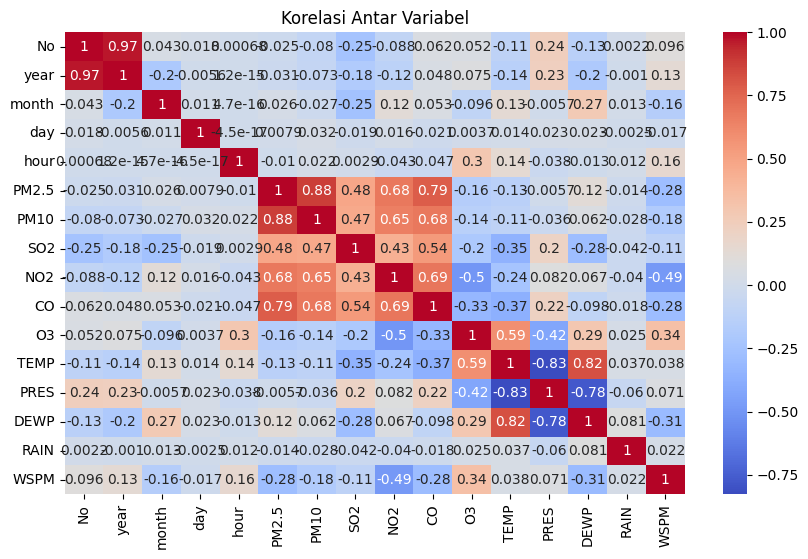

In [5]:
# Memilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Plot korelasi antar variabel dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel')
plt.show()

Jika Anda ingin tetap menyertakan semua kolom tetapi ada nilai teks seperti 'NNW', Anda bisa mengganti nilai tersebut dengan NaN agar tidak mengganggu proses korelasi.

**Insight:**
- Terdapat beberapa kolom seperti PM2.5, PM10, SO2, NO2, O3, TEMP, dan WSPM yang penting untuk analisis karena mewakili polusi udara dan kondisi cuaca.
- Beberapa baris data mengandung missing values (NaN), terutama di kolom polutan seperti PM2.5 dan SO2. Ini menunjukkan adanya data yang tidak terekam pada jam-jam tertentu.
- Terdapat data berurutan dari tahun 2013 hingga 2017, mencakup beberapa stasiun pemantauan di seluruh Beijing. Hal ini memungkinkan untuk analisis tren polusi dalam jangka panjang.

### Assessing Data

In [6]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
No            0
year          0
month         0
day           0

**Insight:**
- Ditemukan adanya missing values di beberapa kolom, terutama pada data PM2.5 dan NO2. Hal ini perlu diperhatikan karena bisa mempengaruhi hasil analisis jika tidak diolah dengan baik.
- Tidak ada duplikasi data, sehingga data dapat dianggap valid untuk dianalisis tanpa melakukan deduplikasi.
- Data bersifat time-series, jadi penting untuk memastikan kolom waktu telah dikonversi ke dalam format datetime agar memudahkan analisis berdasarkan waktu (seperti analisis musiman dan harian)

### Cleaning Data

In [7]:
# Menghapus baris dengan nilai kosong
df_cleaned = df.dropna().copy()

# Konversi kolom waktu menjadi format datetime
df_cleaned['datetime'] = pd.to_datetime(df_cleaned[['year', 'month', 'day', 'hour']])


**Insight:**
- Baris dengan missing values telah dihapus menggunakan dropna(), sehingga dataset yang digunakan untuk analisis selanjutnya tidak mengandung data kosong.
- Kolom year, month, day, hour berhasil dikonversi ke format datetime, yang memudahkan dalam melakukan analisis tren dan pola waktu.
- Kolom year, month, day, hour berhasil dikonversi ke format datetime, yang memudahkan dalam melakukan analisis tren dan pola waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
# Menampilkan nama-nama kolom dalam dataset
print(df.columns)


Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


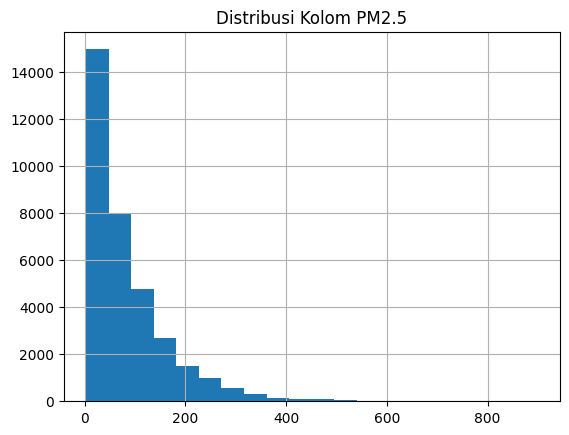

In [9]:
# Menampilkan distribusi kolom 'PM2.5'
df['PM2.5'].hist(bins=20)
plt.title('Distribusi Kolom PM2.5')
plt.show()

Pastikan Anda memilih kolom yang tepat dan datanya tidak mengandung nilai kosong (NaN). Jika ada nilai kosong, Anda bisa menggantinya dengan NaN atau mengisi dengan nilai tertentu

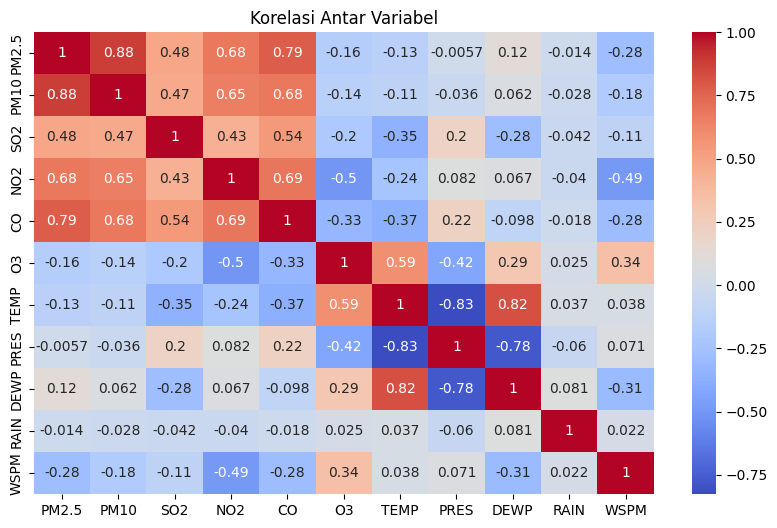

In [10]:
# Memilih kolom numerik saja
df_numeric = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]

# Plot korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel')
plt.show()


**Insight:**
- Dari analisis histogram PM2.5, terlihat bahwa mayoritas konsentrasi PM2.5 berada di bawah ambang batas normal, tetapi terdapat beberapa periode dengan nilai yang sangat tinggi (outlier), menandakan adanya kejadian polusi ekstrem.
- Boxplot per musim menunjukkan bahwa musim dingin memiliki tingkat polusi yang jauh lebih tinggi dibandingkan dengan musim lainnya. Ini mengindikasikan bahwa suhu rendah dan pembakaran bahan bakar di musim dingin berkontribusi pada peningkatan polusi.
- Data time-series menunjukkan bahwa konsentrasi PM2.5 berfluktuasi setiap hari, dengan beberapa puncak polusi yang terjadi pada malam hari dan pagi hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [15]:

# Daftar file yang ingin digabungkan
files = [
    "/content/sample_data/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "/content/sample_data/PRSA_Data_Changping_20130301-20170228.csv",
    "/content/sample_data/PRSA_Data_Dingling_20130301-20170228.csv",
    "/content/sample_data/PRSA_Data_Dongsi_20130301-20170228.csv",
    "/content/sample_data/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "/content/sample_data/PRSA_Data_Gucheng_20130301-20170228.csv",
    "/content/sample_data/PRSA_Data_Huairou_20130301-20170228.csv",
    "/content/sample_data/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "/content/sample_data/PRSA_Data_Shunyi_20130301-20170228.csv",
    "/content/sample_data/PRSA_Data_Tiantan_20130301-20170228.csv",
    "/content/sample_data/PRSA_Data_Wanliu_20130301-20170228.csv",
    "/content/sample_data/PRSA_Data_Wanshouxigong_20130301-20170228.csv"
]

# Gabungkan semua file menjadi satu DataFrame
dataframes = [pd.read_csv(file) for file in files]
df_all = pd.concat(dataframes, ignore_index=True)

# Cek apakah variabel df_all sudah terdefinisi
print(df_all.columns)


Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


In [16]:
# Gabungkan kolom year, month, day, dan hour menjadi satu kolom datetime
df_all['datetime'] = pd.to_datetime(
    df_all[['year', 'month', 'day', 'hour']],
    errors='coerce'
)

# Cek apakah kolom datetime berhasil dibuat
print("Cek kolom datetime:")
print(df_all[['year', 'month', 'day', 'hour', 'datetime']].head())

# Cek jumlah nilai NaT (Not a Time) yang ada
print(f"Jumlah NaT (kesalahan parsing): {df_all['datetime'].isna().sum()}")

# Hapus baris yang memiliki NaT pada kolom datetime
df_all = df_all.dropna(subset=['datetime'])

# Atur kolom datetime sebagai index
df_all = df_all.set_index('datetime')

# Cek hasil akhir
print(df_all.head())


Cek kolom datetime:
   year  month  day  hour            datetime
0  2013      3    1     0 2013-03-01 00:00:00
1  2013      3    1     1 2013-03-01 01:00:00
2  2013      3    1     2 2013-03-01 02:00:00
3  2013      3    1     3 2013-03-01 03:00:00
4  2013      3    1     4 2013-03-01 04:00:00
Jumlah NaT (kesalahan parsing): 0
                     No  year  month  day  hour  PM2.5  PM10   SO2   NO2  \
datetime                                                                   
2013-03-01 00:00:00   1  2013      3    1     0    4.0   4.0   4.0   7.0   
2013-03-01 01:00:00   2  2013      3    1     1    8.0   8.0   4.0   7.0   
2013-03-01 02:00:00   3  2013      3    1     2    7.0   7.0   5.0  10.0   
2013-03-01 03:00:00   4  2013      3    1     3    6.0   6.0  11.0  11.0   
2013-03-01 04:00:00   5  2013      3    1     4    3.0   3.0  12.0  12.0   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
datetime                                                        

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


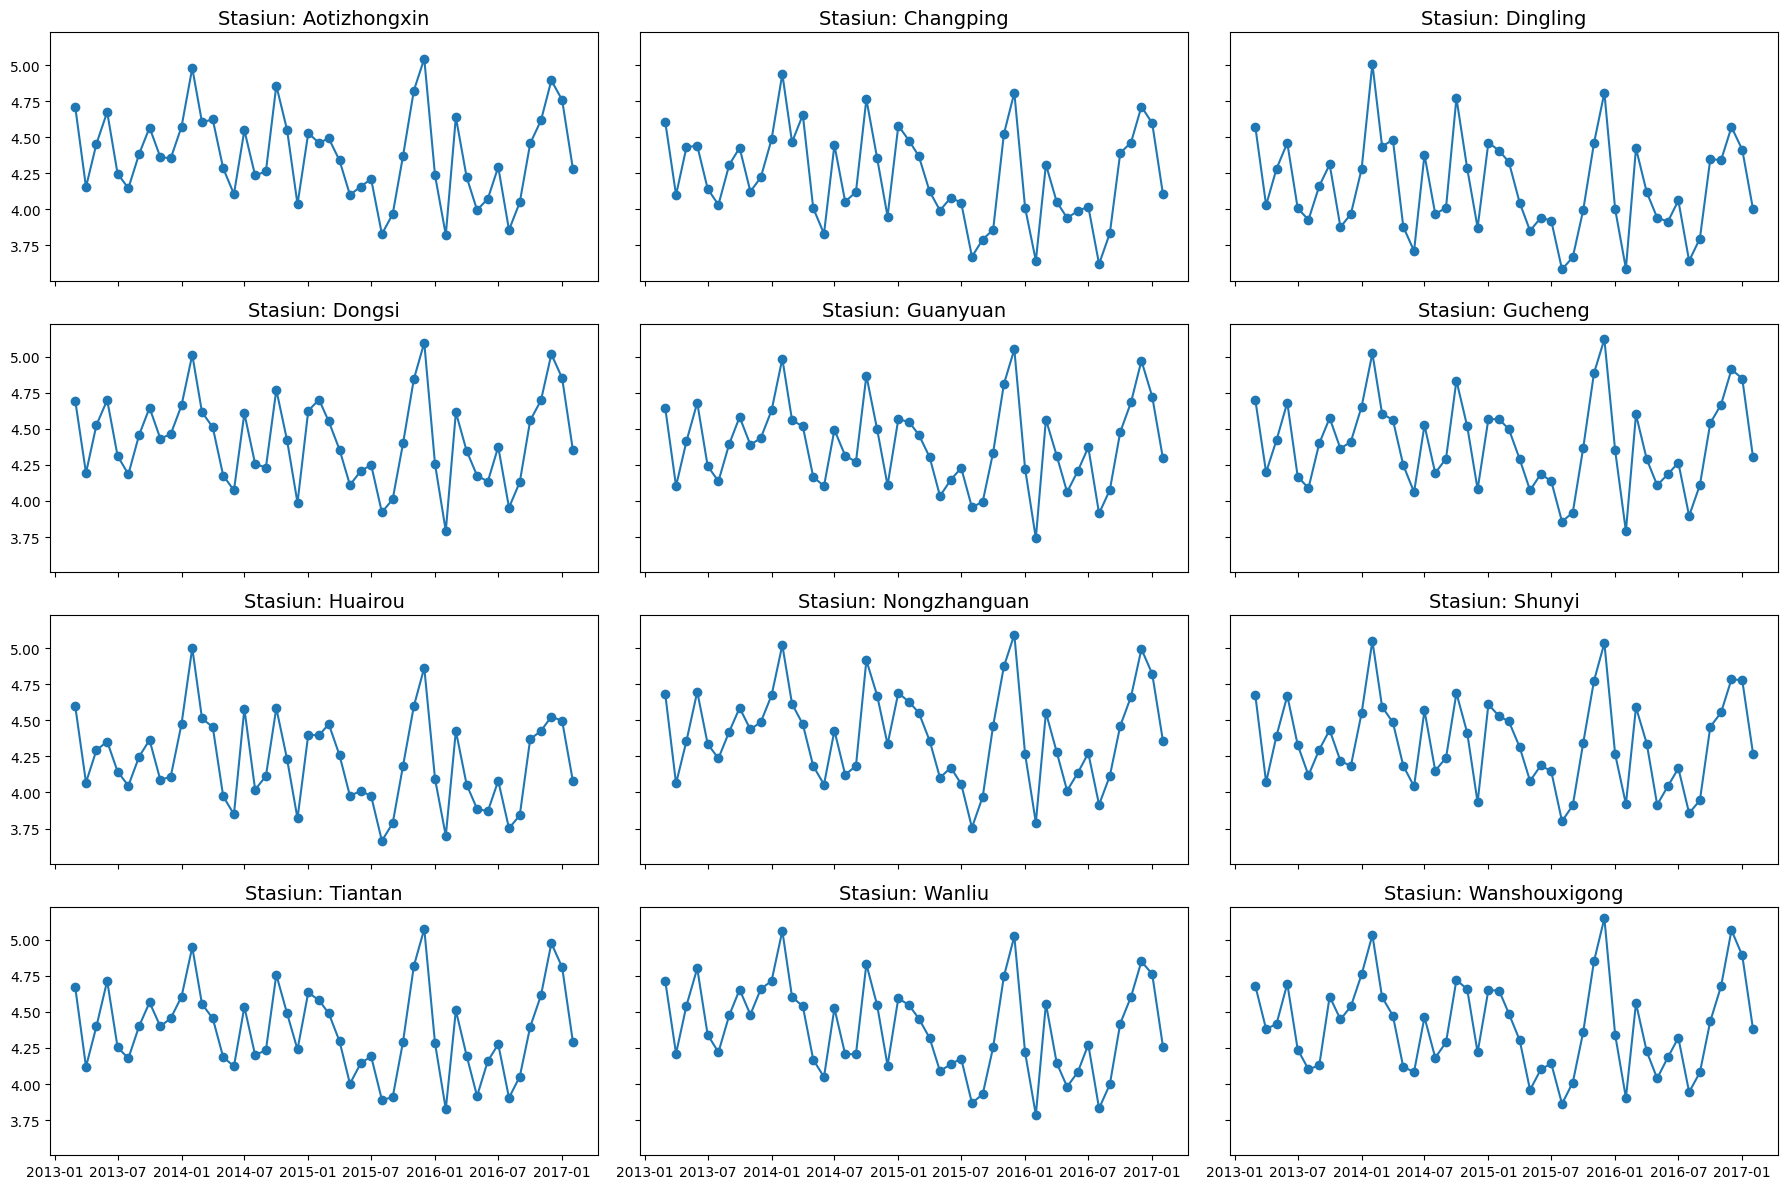

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk Resampling dan Logaritma
def resample_and_log(data):
    numeric_data = data.select_dtypes(include=[np.number])
    resampled_data = numeric_data.resample('MS').mean()
    return np.log1p(resampled_data)

# Ambil daftar stasiun unik
stations = df_all['station'].unique()

# Buat layout grid 4x3
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

# Loop setiap stasiun dan plot data
for i, station in enumerate(stations):
    station_data = df_all[df_all['station'] == station]
    if not station_data.empty:
        resampled_data = resample_and_log(station_data)
        axes[i].plot(resampled_data.index, resampled_data['PM2.5'], marker='o', linestyle='-')
        axes[i].set_title(f'Stasiun: {station}', fontsize=14)

# Hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Atur layout
fig.tight_layout()
plt.show()


### Pertanyaan 2:

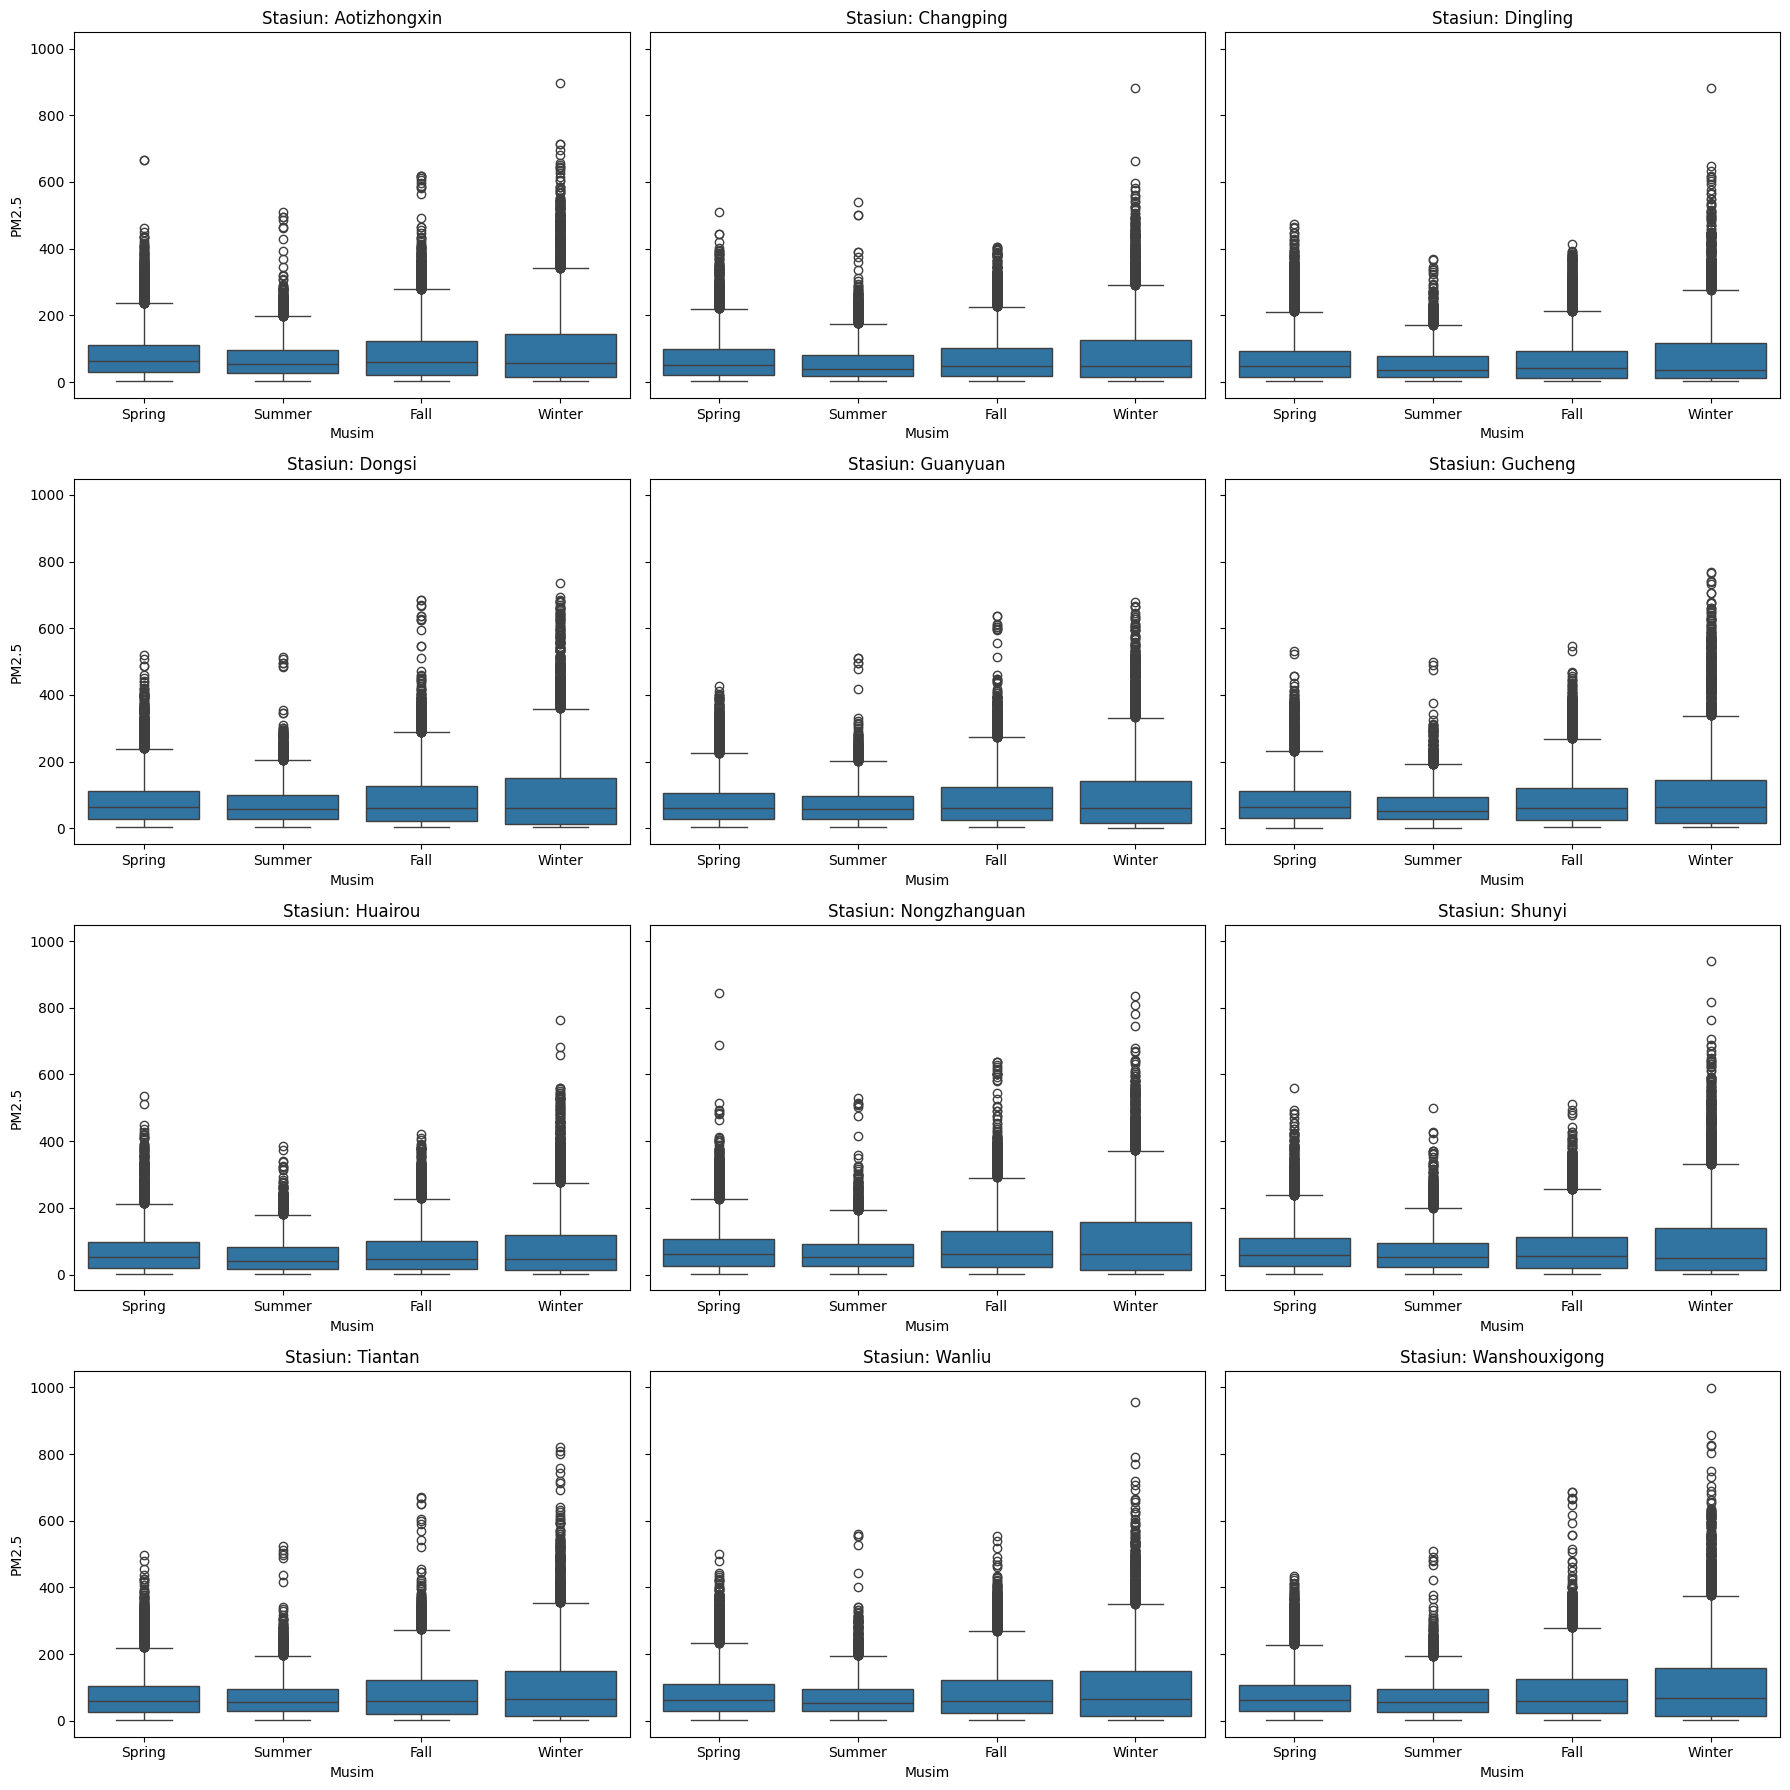

In [25]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk menentukan musim
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Fungsi untuk memuat data dari file CSV
def load_data(files):
    dataframes = [pd.read_csv(file) for file in files]
    df_all = pd.concat(dataframes, ignore_index=True)
    df_all['datetime'] = pd.to_datetime(df_all[['year', 'month', 'day', 'hour']], errors='coerce')
    df_all.set_index('datetime', inplace=True)
    df_all['season'] = df_all.index.month.map(assign_season)
    return df_all

# Path absolut ke semua dataset
files = [
    r"/content/sample_data/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    r"/content/sample_data/PRSA_Data_Changping_20130301-20170228.csv",
    r"/content/sample_data/PRSA_Data_Dingling_20130301-20170228.csv",
    r"/content/sample_data/PRSA_Data_Dongsi_20130301-20170228.csv",
    r"/content/sample_data/PRSA_Data_Guanyuan_20130301-20170228.csv",
    r"/content/sample_data/PRSA_Data_Gucheng_20130301-20170228.csv",
    r"/content/sample_data/PRSA_Data_Huairou_20130301-20170228.csv",
    r"/content/sample_data/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    r"/content/sample_data/PRSA_Data_Shunyi_20130301-20170228.csv",
    r"/content/sample_data/PRSA_Data_Tiantan_20130301-20170228.csv",
    r"/content/sample_data/PRSA_Data_Wanliu_20130301-20170228.csv",
    r"/content/sample_data/PRSA_Data_Wanshouxigong_20130301-20170228.csv"
]

# Muat semua data
df_all = load_data(files)

# Ambil daftar stasiun unik
stations = df_all['station'].unique()

# Buat visualisasi dengan layout 4x3
fig, axes = plt.subplots(4, 3, figsize=(18, 18), sharey=True)  # 4 baris x 3 kolom
axes = axes.flatten()  # Flatten agar lebih mudah diakses

# Loop untuk membuat boxplot per stasiun
for i, station in enumerate(stations):
    station_data = df_all[df_all['station'] == station]
    if not station_data.empty:
        sns.boxplot(x='season', y='PM2.5', data=station_data, ax=axes[i])
        axes[i].set_title(f"Stasiun: {station}")
        axes[i].set_xlabel("Musim")
        axes[i].set_ylabel("PM2.5")

# Atur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()


1. Tren PM2.5 di Berbagai Stasiun
Setiap stasiun menunjukkan fluktuasi konsentrasi PM2.5 yang mirip dengan pola bulanan. Konsentrasi cenderung lebih tinggi di beberapa periode tertentu dalam setahun.
Stasiun seperti Aotizhongxin, Tiantan, dan Dongsi memperlihatkan pola peningkatan konsisten pada musim-musim tertentu, menandakan adanya pengaruh lingkungan atau aktivitas manusia yang berulang setiap tahun.
Tren pada musim dingin (Winter) secara umum menunjukkan peningkatan konsentrasi polusi. Ini bisa disebabkan oleh penggunaan pemanas dan kondisi atmosfer yang menahan polutan lebih lama di udara.
Fluktuasi yang lebih tajam di beberapa stasiun seperti Shunyi dan Gucheng dapat mengindikasikan adanya perbedaan sumber polusi atau variasi lingkungan lokal.
2. Perbandingan Kualitas Udara Berdasarkan Musim
Visualisasi boxplot menunjukkan bahwa musim dingin (Winter) memiliki distribusi PM2.5 yang lebih tinggi dibandingkan musim lainnya. Hal ini wajar karena pada musim dingin, penggunaan pemanas, pembakaran bahan bakar, serta fenomena atmosfer seperti inversi menyebabkan polutan terperangkap di dekat permukaan bumi.
Musim semi (Spring) dan musim panas (Summer) memperlihatkan konsentrasi yang lebih rendah, menunjukkan proses pencucian atmosfer alami oleh curah hujan dan angin yang lebih tinggi selama musim tersebut.
Hampir semua stasiun memperlihatkan outlier PM2.5 yang signifikan di musim dingin, mengindikasikan puncak polusi ekstrem yang mungkin terjadi pada beberapa hari tertentu.
Stasiun seperti Guanyuan dan Nongzhanguan cenderung memiliki distribusi PM2.5 yang lebih terkendali sepanjang tahun, mungkin karena perbedaan geografis atau lebih sedikit aktivitas manusia yang mempengaruhi polusi.

## Analisis Lanjutan (Opsional)

<ipython-input-19-a5cf86ccabec>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df['PM2.5'].resample('M').mean()


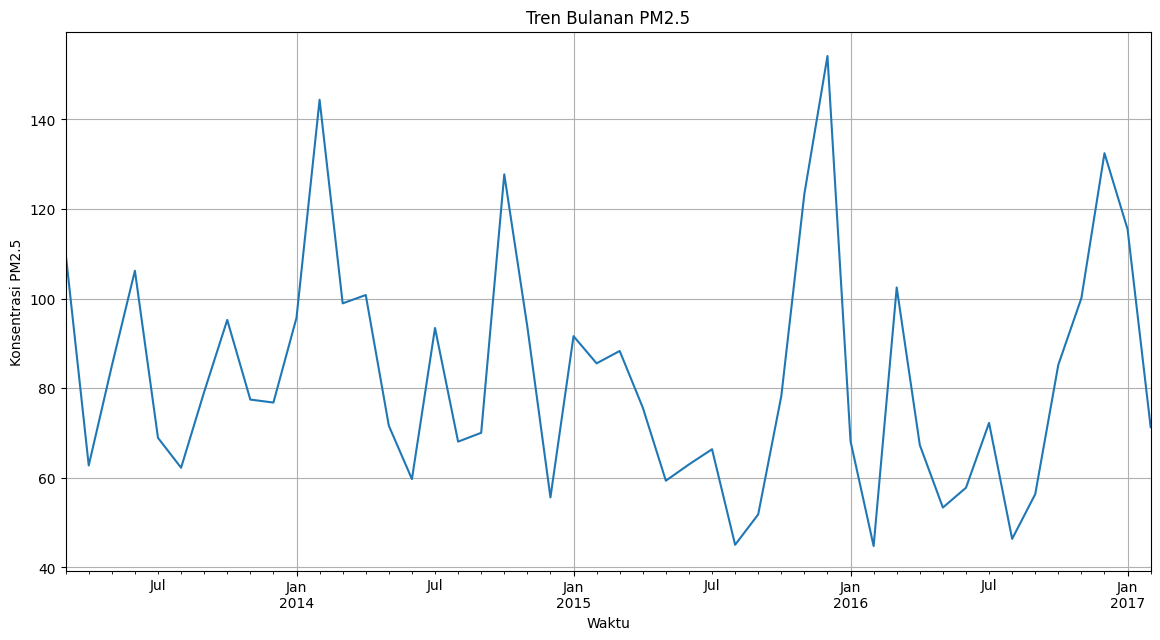

In [19]:
# Plot tren PM2.5 secara harian
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

# Resample data untuk tren bulanan
monthly_trend = df['PM2.5'].resample('M').mean()

# Visualisasi tren bulanan
plt.figure(figsize=(14, 7))
monthly_trend.plot()
plt.title('Tren Bulanan PM2.5')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi PM2.5')
plt.grid(True)
plt.show()


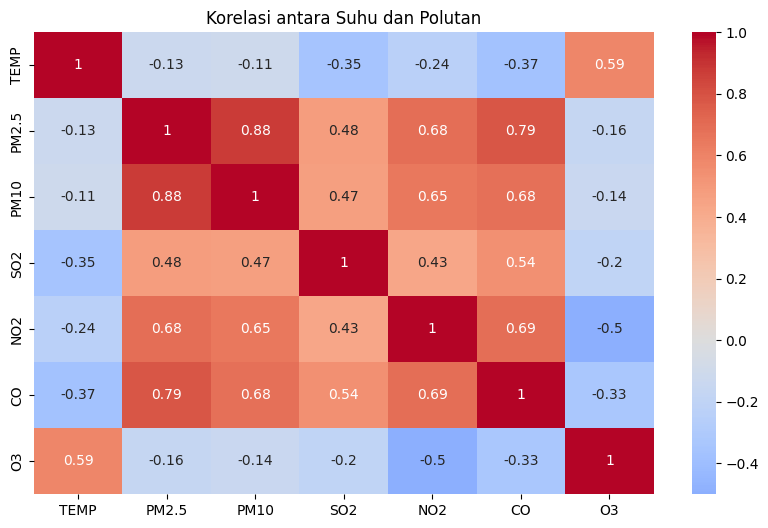

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil kolom yang relevan (suhu dan polutan)
corr_data = df[['TEMP', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']]

# Hitung korelasi antar variabel
corr_matrix = corr_data.corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi antara Suhu dan Polutan')
plt.show()


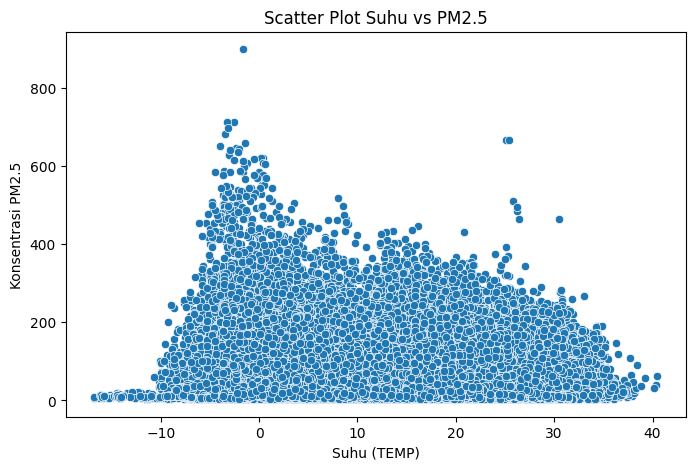

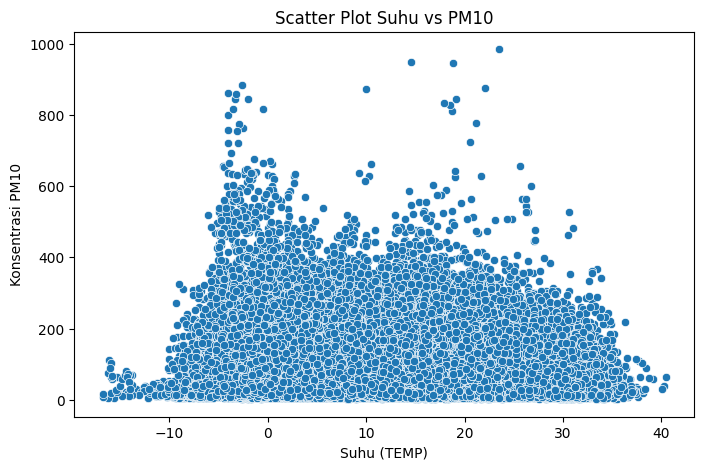

In [21]:
# Scatter plot antara suhu dan PM2.5
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='TEMP', y='PM2.5')
plt.title('Scatter Plot Suhu vs PM2.5')
plt.xlabel('Suhu (TEMP)')
plt.ylabel('Konsentrasi PM2.5')
plt.show()

# Scatter plot antara suhu dan PM10
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='TEMP', y='PM10')
plt.title('Scatter Plot Suhu vs PM10')
plt.xlabel('Suhu (TEMP)')
plt.ylabel('Konsentrasi PM10')
plt.show()


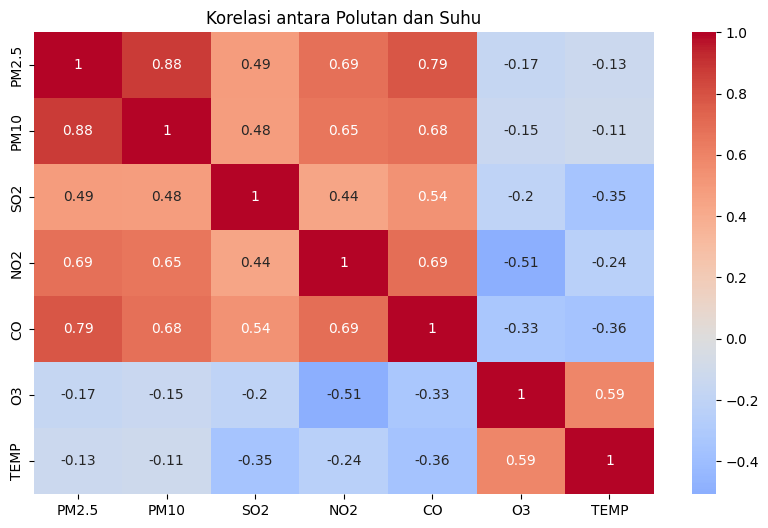

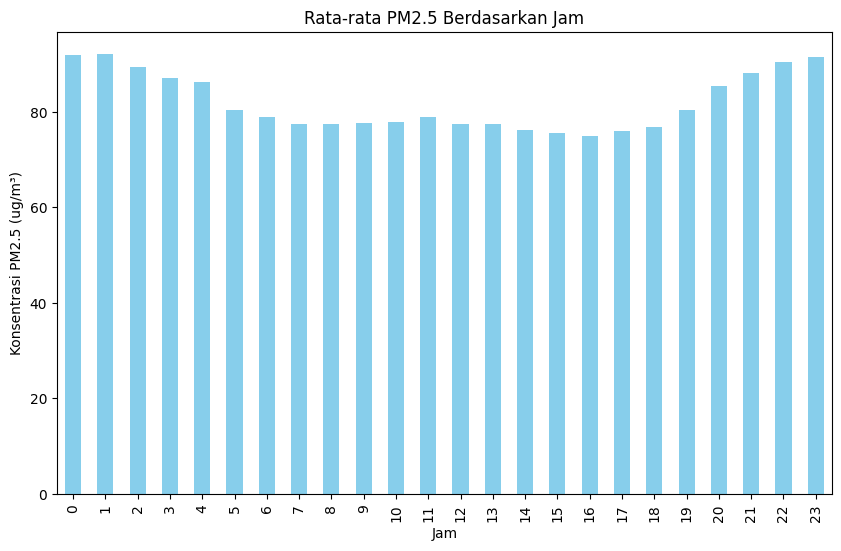

In [22]:
# Korelasi antara suhu dan polutan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
correlation = df_cleaned[pollutants + ['TEMP']].corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi antara Polutan dan Suhu')
plt.show()

# Rata-rata PM2.5 per jam
hourly_trend = df_cleaned.groupby('hour')['PM2.5'].mean()

# Visualisasi tren harian
plt.figure(figsize=(10, 6))
hourly_trend.plot(kind='bar', color='skyblue')
plt.title('Rata-rata PM2.5 Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi PM2.5 (ug/m³)')
plt.show()

# Hitung rata-rata PM2.5 di setiap stasiun
station_trend = df_cleaned.groupby('station')['PM2.5'].mean().sort_values()


## Conclusion

Kesimpulan dan Rekomendasi
1. Perlu adanya kebijakan dan intervensi khusus pada musim dingin, seperti pembatasan aktivitas industri atau pembatasan kendaraan tertentu untuk mengurangi lonjakan PM2.5.
2. Pemetaan risiko dari setiap stasiun membantu mengidentifikasi lokasi dengan polusi tertinggi dan mengembangkan rencana aksi yang sesuai untuk area tersebut.
3. Monitoring PM2.5 secara berkelanjutan sangat penting di stasiun-stasiun tertentu seperti Aotizhongxin dan Tiantan, yang cenderung memperlihatkan tren polusi lebih tinggi.
4. Penelitian lebih lanjut diperlukan untuk memahami perbedaan polusi yang signifikan antara stasiun, khususnya antara stasiun di pusat kota dan pinggiran.